# Getting Earthquake Information

Exploring a few different ways of accessing GeoNet's earthquake data for use on obspy.  See https://github.com/crleblanc/jupyter_playground for more info on these notebooks.  See http://info.geonet.org.nz/display/appdata/Applications+and+Data for more information on accessing GeoNet data.

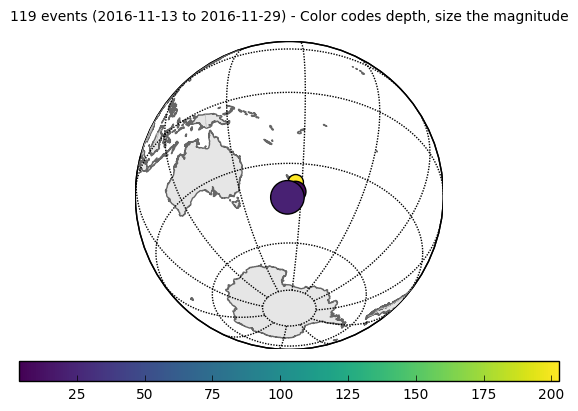

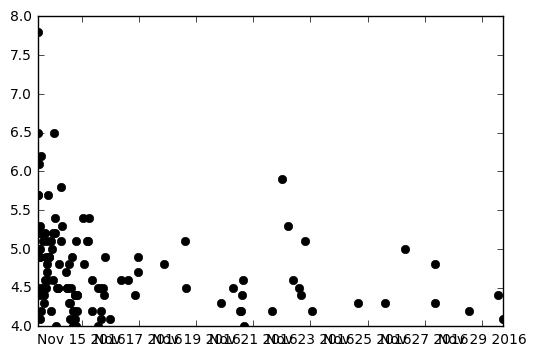

In [36]:
# Your example:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import matplotlib.pyplot as plt
import datetime
# geonet does not have FDSN service on their catalogue. IRIS only reports 4+ events:
#geonetclient=Client('http://service.geonet.org.nz')
geonetclient=Client()

events = geonetclient.get_events(starttime=UTCDateTime("2016-11-13T11:00:00"),minlongitude=166,maxlongitude=178,minlatitude=-50,maxlatitude=-34)
events.plot(projection='ortho')

for event in events:
    t=event.origins[0].time
    time = t.datetime
    mag=event.magnitudes[0].mag
    plt.plot(time,mag,'ko')
plt.show()


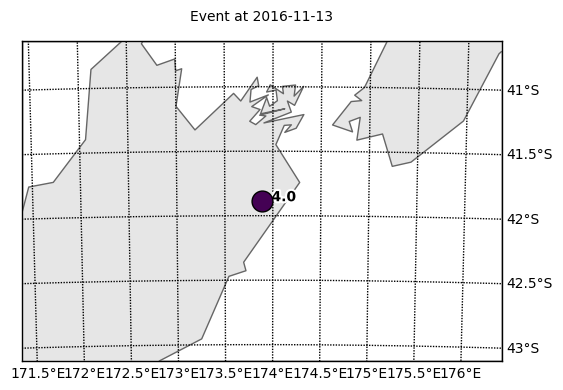

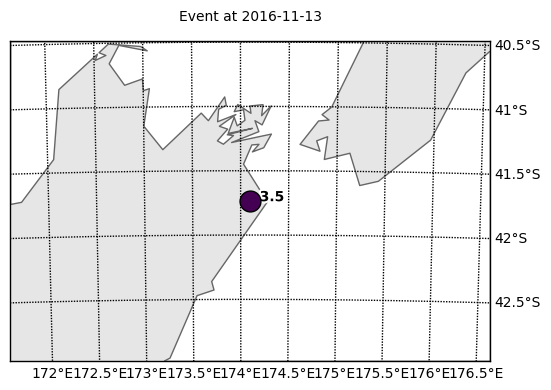

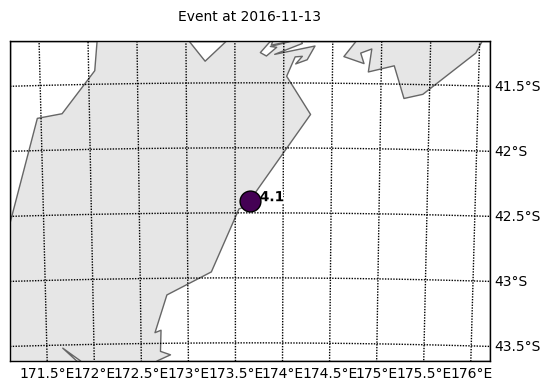

In [38]:
#!/usr/bin/env python

# QuakeSearch approach: Get the list of quake publicids from quakesearch API
import requests
from datetime import datetime
from obspy import read_events, UTCDateTime

def quake_geojson(bbox, startdate, enddate, quakesearch_url='https://quakesearch.geonet.org.nz/geojson'):
    parameters = {'bbox': bbox, 'startdate': startdate, 'enddate': enddate }
    r = requests.get(quakesearch_url,params=parameters)
    r.raise_for_status()
    return r.json()

def main():
    bbox_coords = [170.70557, -44.69990, 175.55054, -40.56389]
    bbox_str = ','.join([str(x) for x in bbox_coords])
    quakes = quake_geojson(bbox_str, datetime(2016,11,13,11), datetime(2016,11,13,15))
    
    public_ids = [x['properties']['publicid'] for x in quakes['features']]
    
    # only plot the first three quakes as an example
    for public_id in public_ids[:3]:
        cat = read_events(pathname_or_url='http://quakeml.geonet.org.nz/quakeml/1.2/'+public_id)
        cat.plot(projection="local")


if __name__ == '__main__':
    main()